logp = -3,398.7, ||grad|| = 1,989: 100%|███████████████████████████████████████████████| 7/7 [00:00<00:00, 2334.99it/s]
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [mu]
Sampling 2 chains, 0 divergences: 100%|█████████████████████████████████████| 41000/41000 [00:11<00:00, 3514.34draws/s]
The number of effective samples is smaller than 25% for some parameters.
d:\ProgramData\Anaconda3\lib\site-packages\pymc3\plots\__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))
d:\ProgramData\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
d:\ProgramData\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5002E6908>,
      dtype=object)

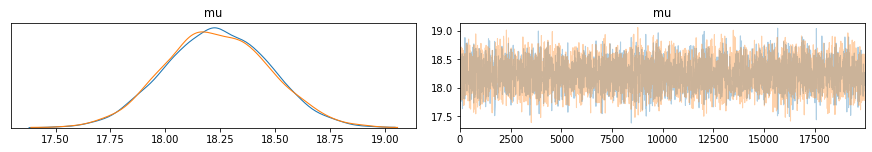

In [2]:
#例题17.10
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import scipy
import scipy.stats as stats
import scipy.optimize as opt
import matplotlib.pyplot as plt
def poisson_logprob(mu, sign=-1):
    return np.sum(sign*stats.poisson.logpmf(y_obs, mu=mu))
# 读取数据文件
messages = pd.read_csv('data/QQ_data.csv')
with pm.Model() as model:
    # 创建一个概率模型
    mu = pm.Uniform('mu', lower=0, upper=60)
    likelihood = pm.Poisson('likelihood', mu=mu, observed=messages['numbers'].values)
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(20000, step, start=start, progressbar=True)
y_obs = messages['numbers'].values
#极大似然估计求解mu
freq_results = opt.minimize_scalar(poisson_logprob)
#traceplot函数来绘制后验采样的趋势图
pm.traceplot(trace, varnames=['mu'], lines={'mu': freq_results['x']})

In [1]:
# 例17.11 定义一个抛硬币问题，假设硬币正面向上的概率为0.35，生成数据样本
import numpy as np
import scipy.stats as stats
import pymc3 as pm
np.random.seed(1)
n_experiments = 100 # 试验次数
theta_real = 0.35 # 硬币正面向上的概率参数 θ，用 theta_real 来表示
data = stats.bernoulli.rvs(p=theta_real, size=n_experiments)
print(data)

[0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1
 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1
 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0]


In [2]:
with pm.Model() as our_first_model: # 构建了一个模型的容器
    theta = pm.Beta('theta', alpha=1, beta=1) # 指定先验
    #用跟先验相同的语法描述了似然概率，用 observed 参数传递了观测到的数据
    y= pm.Bernoulli('y', p=theta, observed=data)
    # 返回最大后验（Maximum a Posteriori，MAP），为采样方法提供一个初始点
    start=pm.find_MAP()
    # 采样方法Metropolis-Hastings 算法，PyMC3会根据不同参数的特性自动地赋予一个采样器
    step = pm.Metropolis()
    # 执行采样，其中第 1 个参数是采样次数，第 2 个和第 3 个参数分别是采样方法和初始点
    trace = pm.sample(1000, step=step, start=start)
    

logp = -69.315, ||grad|| = 14: 100%|█████████████████████████████████████████████████████| 7/7 [00:00<00:00, 31.39it/s]
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 3000/3000 [00:04<00:00, 670.06draws/s]
The number of effective samples is smaller than 25% for some parameters.


d:\ProgramData\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
d:\ProgramData\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0EB5E1F88>,
      dtype=object)

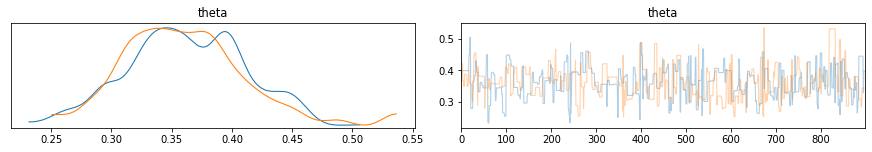

In [3]:
#样本路径图
burnin = 100
chain = trace[burnin:]
pm.traceplot(chain, lines={'theta': theta_real})

In [4]:
#Gelman-Rubin 检验
pm.gelman_rubin(chain)

d:\ProgramData\Anaconda3\lib\site-packages\pymc3\stats\__init__.py:43: UserWarning: gelman_rubin has been deprecated. In the future, use rhat instead.
  warnings.warn("gelman_rubin has been deprecated. In the future, use rhat instead.")


<xarray.Dataset>
Dimensions:  ()
Data variables:
    theta    float64 1.015

In [6]:
pm.summary(chain)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
theta,0.362,0.051,0.277,0.461,0.003,0.002,313.0,298.0,329.0,292.0,1.01


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0EBBB7688>,
      dtype=object)

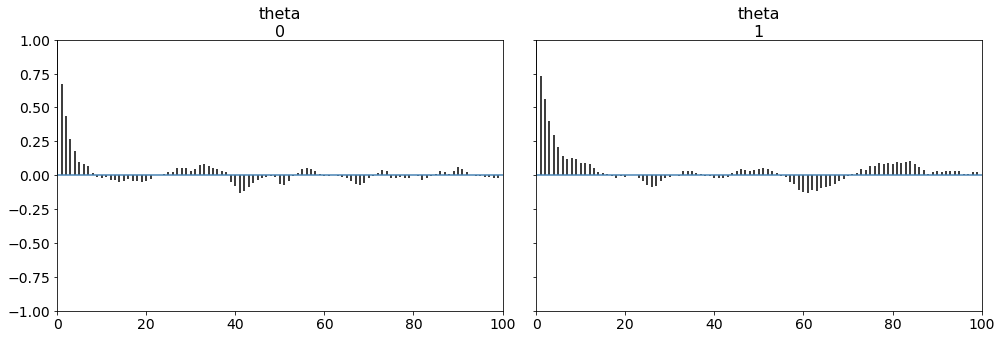

In [7]:
pm.autocorrplot(chain)

In [8]:
pm.effective_n(chain)['theta']

d:\ProgramData\Anaconda3\lib\site-packages\pymc3\stats\__init__.py:50: UserWarning: effective_n has been deprecated. In the future, use ess instead.
  warnings.warn("effective_n has been deprecated. In the future, use ess instead.")


<xarray.DataArray 'theta' ()>
array(329.01445761)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0EA3FEC48>],
      dtype=object)

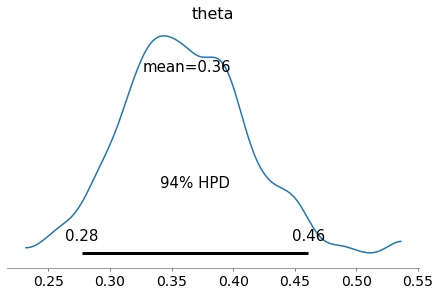

In [10]:
pm.plot_posterior(chain)